<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Gender_Classification_by_Voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Classification

> Gender Classification by Voice and Speech Analysis

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing dataset from drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel("/content/drive/My Drive/voice.xlsx")
df = pd.DataFrame(data)
df.shape

(3168, 21)

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


meanfreq 	-	 0.0
sd 	-	 0.0
median 	-	 0.0
Q25 	-	 0.0
Q75 	-	 0.0
IQR 	-	 0.0
skew 	-	 0.0
kurt 	-	 0.0
sp.ent 	-	 0.0
sfm 	-	 0.0
mode 	-	 0.0
centroid 	-	 0.0
meanfun 	-	 0.0
minfun 	-	 0.0
maxfun 	-	 0.0
meandom 	-	 0.0
mindom 	-	 0.0
maxdom 	-	 0.0
dfrange 	-	 0.0
modindx 	-	 0.0
label 	-	 0.0


> Since data does'nt contain any null values, we can move further

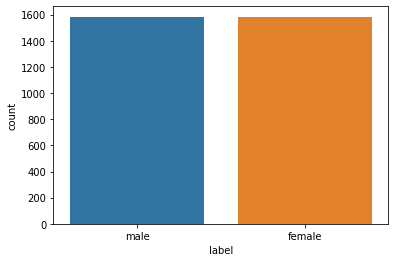

In [6]:
sns.countplot(x='label', data = df) 

> Here graph sows that data is equally balanced between both the classes

In [7]:
# Since our last column(label: male/female) is categorical let's first convert it into numerical

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['label'] = enc.fit_transform(df['label'].astype('str'))

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


> Now for visualising each class, here is plot of any any 1 random sample of voices of each class.

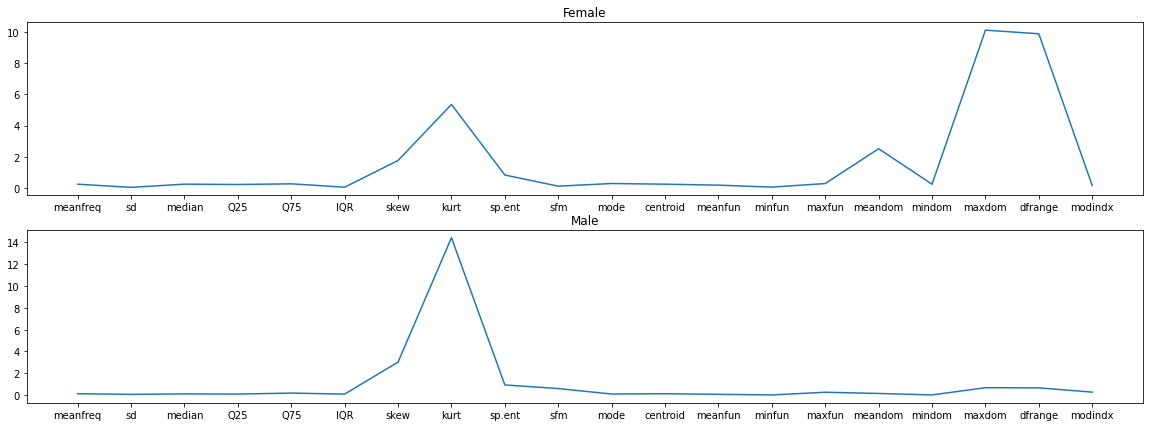

In [24]:
index = 0
label = ['Female', 'Male']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(20,7))

for i in range(2):
  ax[i].plot(df[df['label'] == i].sample(1).iloc[0,:20])
  ax[i].set_title(label[i],)


> This graphs clearly shows how __Kurt__ is genrally high for males as compared to females whereas __Maxdom__ and __Dfrange__ are quite low. These attributes are essential for classfication of data 

> Let's further see how other attributes are related to each other using pairplot

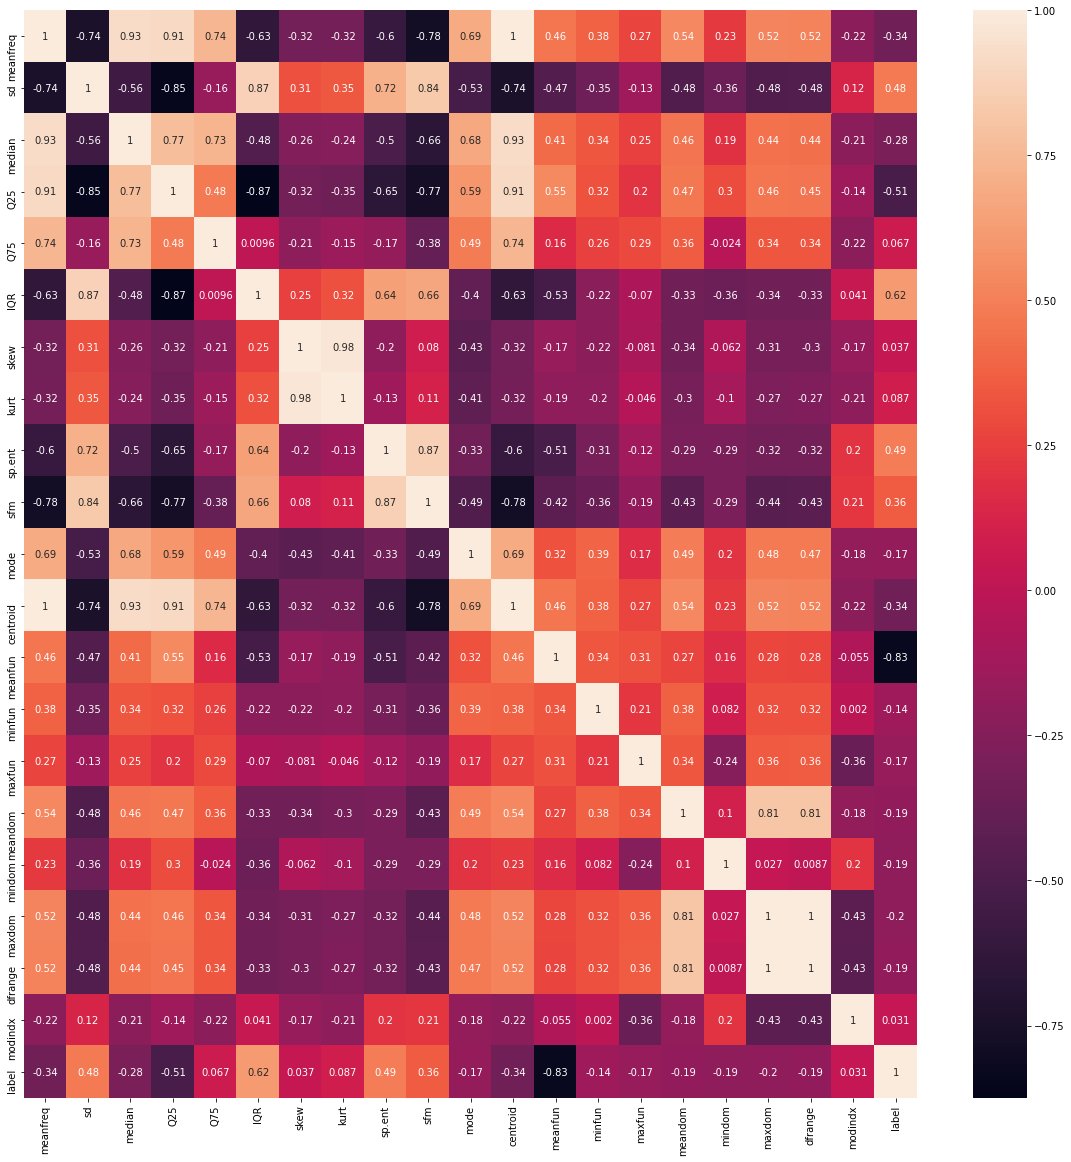

In [9]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cormap, annot = True)

In [10]:
# Simple Function to get the name of top most corelated attributes

def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above wich of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [11]:
top_corelated_values = get_corelated_col(cormap['label'], 0.30)
top_corelated_values

,corr value
meanfreq,-0.337415
sd,0.479539
Q25,-0.511455
IQR,0.618916
sp.ent,0.490552
sfm,0.357499
centroid,-0.337415
meanfun,-0.833921
label,1.000000


> Here I'm plotting pairplot of attributes shown in heatmap most related to attribute __label__.

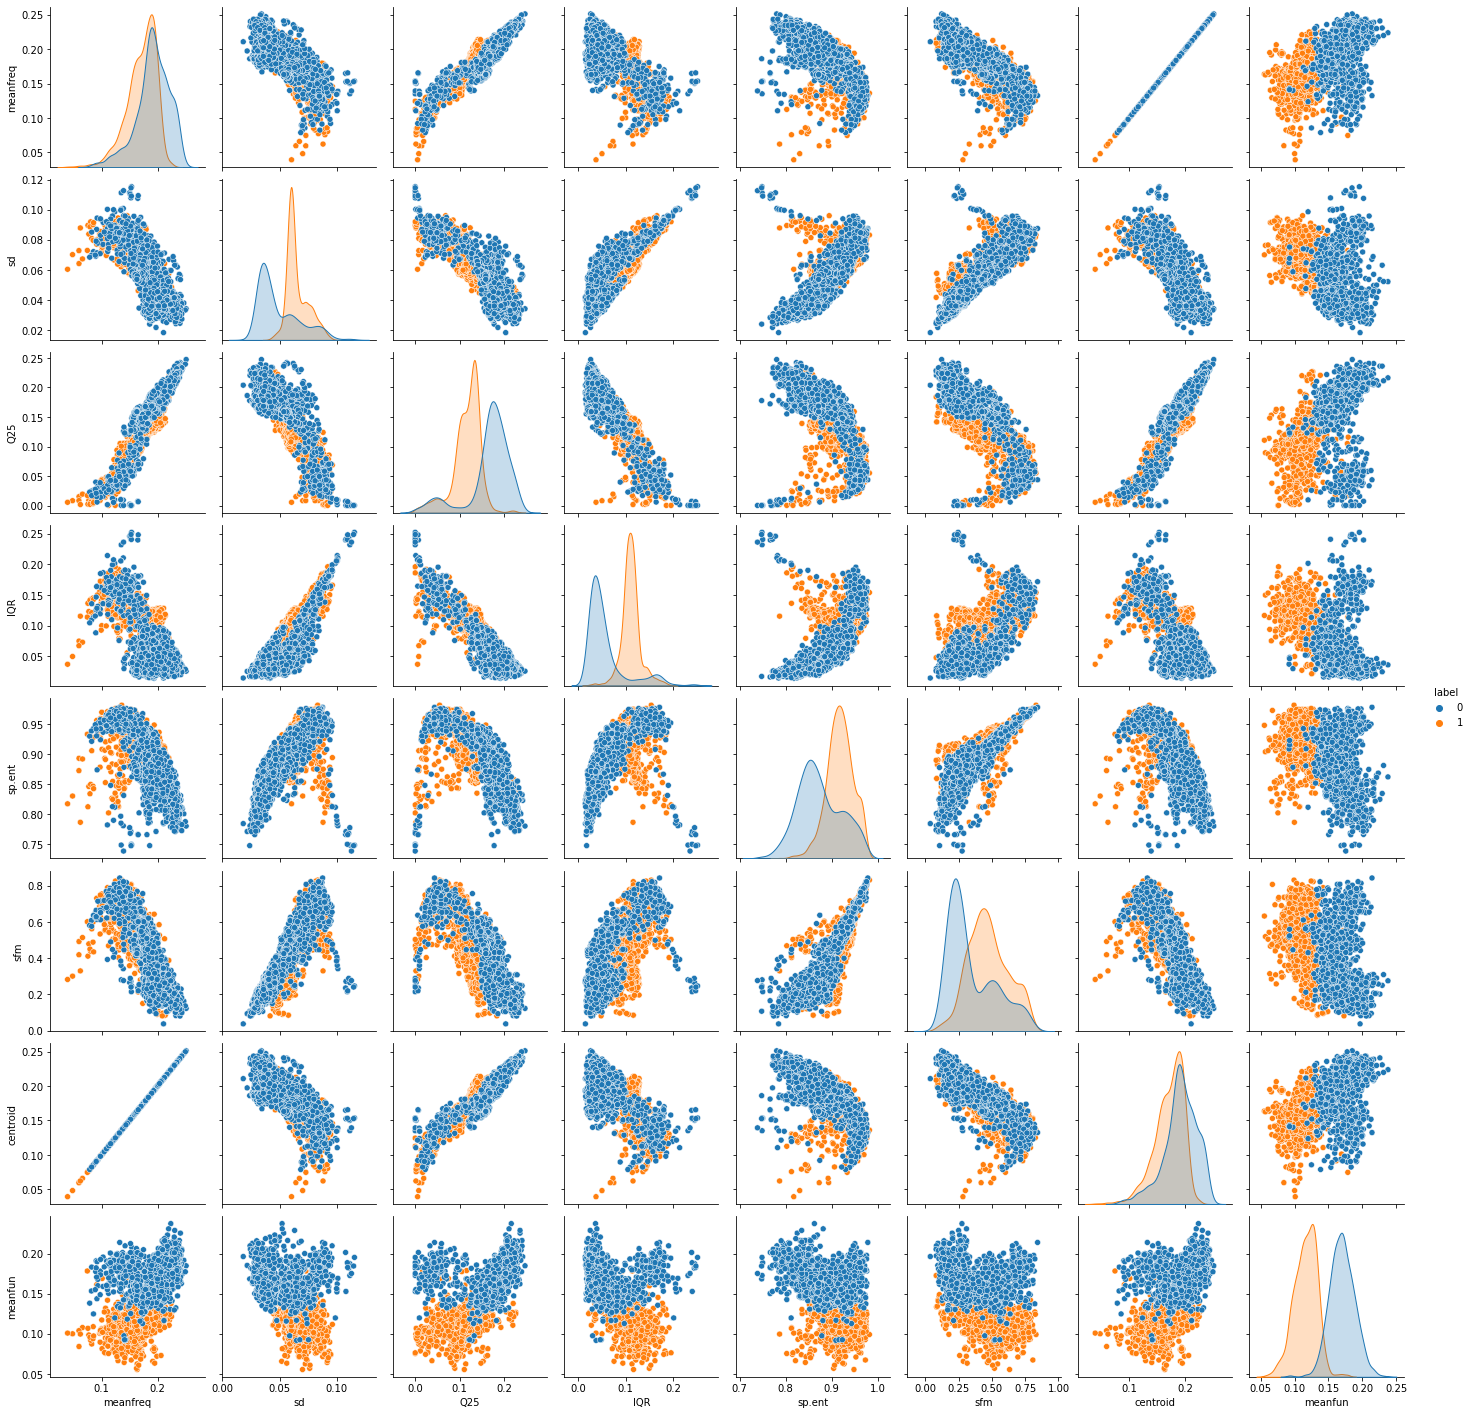

In [12]:
sns.pairplot(df[top_corelated_values.index], hue='label')


> Here diagonal of pairplot depicts how both the classes are correlated with these attributes so nicely , thus they are perfect for using in classification.

> Other plots also shows nice correlation with each other and how both classes are easily saparable over these columns

> So for classification I'm going to use there attributes plus  Kurt, Maxdom and Dfrange since they are also seems essential flrom the line plot

In [13]:
# Saparating features and labels 

X = df[list(top_corelated_values.index[:-1]) + [ 'kurt', 'maxdom', 'dfrange']]
Y = df['label']

#### Data Standardisation

> We arehere standardising data so in order to make the mean of data . Doing standaradisation is appreciated before applying SVM (classifier used in this notebook) as Standardization gives all features the same influence on the distance metric

In [14]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,kurt,maxdom,dfrange
0,-4.049248,0.427355,-2.576102,-0.214778,-0.039083,0.471575,-4.049248,-1.812038,1.762946,-1.431422,-1.419137
1,-3.841053,0.611669,-2.486885,-0.258485,-0.065236,0.594431,-3.841053,-1.079594,4.433008,-1.418107,-1.405818
2,-3.463066,1.603848,-2.706986,0.909326,-1.083730,0.398261,-3.463066,-1.365368,7.326207,-1.429203,-1.416917
3,-0.992157,0.899998,-0.901418,0.632690,1.516383,1.797340,-0.992157,-1.666966,-0.240099,-1.273867,-1.261532
4,-1.530640,1.322561,-1.268395,1.005588,1.708336,2.114740,-1.530640,-1.127233,-0.238940,0.124154,0.136933


In [15]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y)

#### Support Vector Machine

> Here I'm using SVM classifier on this dataset. I'm also gonna tune it's hyperparameters in order to increase the accuracy

In [16]:
# Initialising the SVM classifier 

from sklearn.svm import SVC
from sklearn import metrics

SVC().get_params()   # Hyperparamters of SVC

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
# Now let's make grid for tunning the hyperparametes

from sklearn.model_selection import GridSearchCV

C = np.arange(0.1, 2, 0.1)
kernel = ['linear', 'rbf', 'poly']
gamma = [0.01,0.02,0.03,0.04,0.05]


grid = {'C': C,
        'kernel': kernel,
        'gamma': gamma }

In [18]:
# Fitting SVM classifiers with hyperparameter tunned using grid search(cross validation with 10 folds)

from sklearn.svm import SVC
from sklearn import metrics

svc_grid = GridSearchCV(estimator = SVC(), param_grid = grid, cv = 10)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
svc_grid.best_params_  # Best pairs of hyperparameters provided by grid search

{'C': 1.8000000000000003, 'gamma': 0.05, 'kernel': 'rbf'}

In [20]:
# Prediction

y_pred = svc_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
2945,0,0
550,1,1
1092,1,1
513,1,1
3098,0,0


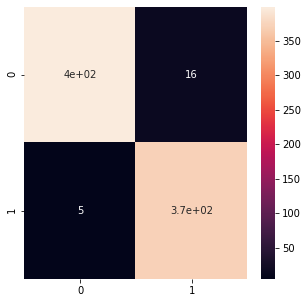

In [21]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

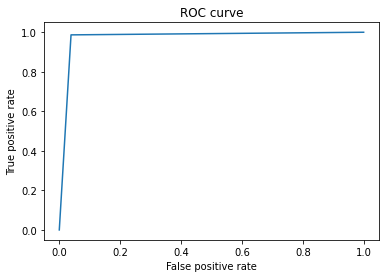

AUC of the predictions: 0.9740915918315172
Accuracy score of the predictions: 0.9734848484848485


In [22]:
from sklearn import metrics

# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

# Measure the Accuracy Score
print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_pred, y_test)))


#### Plotting Decision surface of Radial basis function(rbf) SVC

> Here is a plot of dicision boundary of of SVM usinf __rbf__ kernel. Here two attributes of our dataset __Meanfun__ and __Centroid__ is used for plotting an 2D surface. 

Text(0.5, 1.0, 'Support Vector Machine (Classifier)')

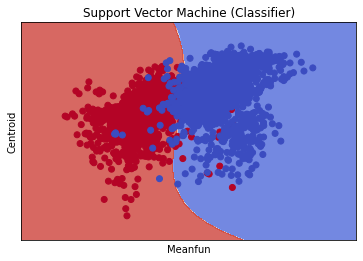

In [23]:


x_min, x_max = X['meanfun'].min() - 1, X['meanfun'].max() + 1
y_min, y_max = X['centroid'].min() - 1, X['centroid'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

svc_plot = SVC(C = 1.8000000000000003, gamma = 0.05, kernel = 'rbf')
svc_plot.fit(X[['meanfun', 'centroid']], Y)
Z = svc_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['meanfun'], X['centroid'], c = Y, cmap = plt.cm.coolwarm)
plt.xlabel('Meanfun')
plt.ylabel('Centroid')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Support Vector Machine (Classifier)")